Evaluating Random Forest


C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.67      0.67      0.67        99
           7       0.74      0.65      0.69        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.67      0.70      0.68       229

Evaluating SGD Classifier
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.51      0.95      0.66        96
           6       0.59      0.27      0.37        99
           7       0.50      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.52       229
   macro avg       0.27      0.21      0.18       2

C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229



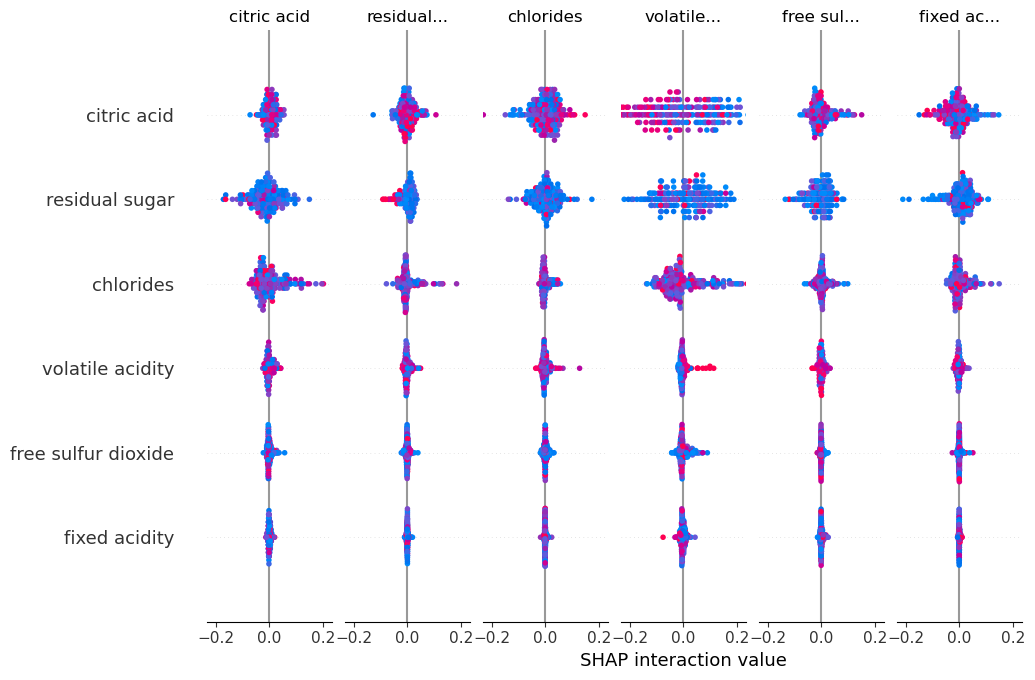

PCA Components:
[[-12.61722029  -1.96133319]
 [ 22.60732927   4.67201196]
 [  7.77282832  -2.32247604]
 ...
 [  1.63062077  16.46420509]
 [  9.96074801  21.82868281]
 [  1.63423306  16.46806963]]


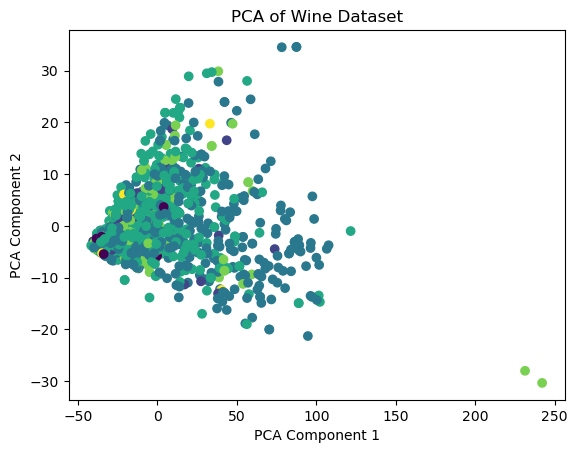

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import shap
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('WineQT.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

# Split the dataset
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "Support Vector Classifier": SVC(probability=True)
}

# Evaluate model function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

# SHAP summary plot function
def plot_shap_summary(model, X_test):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    shap.summary_plot(shap_values, X_test)
    plt.show()  # Ensure the plot displays

def main():
    best_model = None
    best_score = 0
    
    for name, model in models.items():
        print(f"Evaluating {name}")
        evaluate_model(model, X_train, X_test, y_train, y_test)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_model = model
    
    # Plot SHAP summary for the best model
    if best_model:
        plot_shap_summary(best_model, X_test)

    # Dimensionality Reduction with PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    print(f"PCA Components:\n{X_reduced}")
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA of Wine Dataset')
    plt.show()  # Ensure the plot displays

if __name__ == "__main__":
    main()
